<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/06_Exercise_Job_Demand.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Analyzing Data Science Job Demand

## Topics Covered

This exercise goes over:

* Data cleaning and preparation
* Data management
* Extract from datetime
* Pivot tables
* Index management

## Question

In our project we want to see how in-demand skills are trending for data jobs. But before we do that let's look at:
* General trend of data jobs in demand. We're going to look at it by month.

Load data.

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\EliteBook mt44\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Demand of Data Jobs

1. First step is we're only going to look at roles in the United States. So we're going to create a copy of our DataFrame and only include roles that are in the United States.

In [2]:
## Skill count per month for data analysts
df_ca = df[df['job_country'] == 'Canada'].copy()

2. Since we're getting the count by month we need to aggregate by month. We can do this by first extracting the month from our `job_posted_date` column.

In [3]:
# extract the month name from 'job_posted_date'
df_ca['job_posted_month'] = df_ca['job_posted_date'].dt.strftime('%B')

3. Next let's pivot by month and `job_title_short` and get the count.

In [4]:
df_ca_pivot = df_ca.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [5]:
df_ca_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,138,30,179,513,167,53,30,173,45,127
August,118,24,183,374,164,58,56,124,66,116
December,85,41,217,411,157,31,29,113,49,120
February,72,24,148,506,133,34,28,170,45,106
January,136,26,286,945,257,55,68,251,83,118
July,92,25,208,501,169,43,45,153,58,75
June,89,10,183,491,116,44,28,168,45,66
March,75,26,155,533,138,68,32,163,60,105
May,61,9,160,549,108,42,24,148,35,65


4. Let's sort this.

NOTE: See bottom of this notebook for easier way to do this.

In [8]:
# sort job_posted_month_name in df_ca_pivot by job_posted_month value
df_ca_pivot = df_ca_pivot.reset_index()
df_ca_pivot['job_posted_month_no'] = pd.to_datetime(df_ca_pivot['job_posted_month'], format='%B').dt.month
df_ca_pivot = df_ca_pivot.sort_values('job_posted_month_no')
df_ca_pivot = df_ca_pivot.set_index('job_posted_month')
df_ca_pivot = df_ca_pivot.drop(columns='job_posted_month_no')

df_ca_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,136,26,286,945,257,55,68,251,83,118
February,72,24,148,506,133,34,28,170,45,106
March,75,26,155,533,138,68,32,163,60,105
April,138,30,179,513,167,53,30,173,45,127
May,61,9,160,549,108,42,24,148,35,65
June,89,10,183,491,116,44,28,168,45,66
July,92,25,208,501,169,43,45,153,58,75
August,118,24,183,374,164,58,56,124,66,116
September,82,15,209,304,131,39,38,101,35,94


5. Let's now graph this.

Now we could plot all of this

<Axes: xlabel='job_posted_month'>

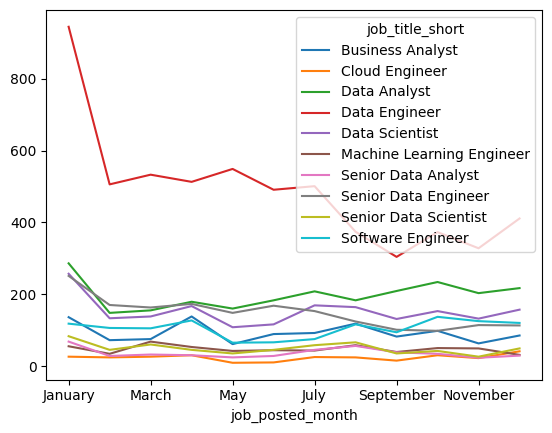

In [9]:
df_ca_pivot.plot(kind='line')

Instead we'll just focus on the top 3 roles.

In [11]:
top_3 = df_ca['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()
top_3

['Data Engineer', 'Data Analyst', 'Data Scientist']

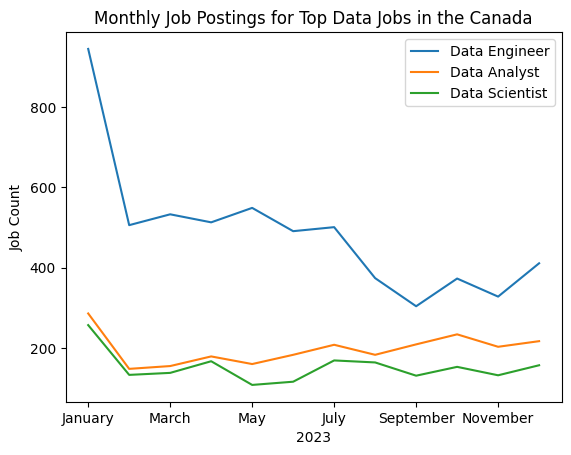

In [12]:
df_ca_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the Canada')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

## Easier Method to Sort Months

After filming the video portion for this I found there is an easier way to sort the months. using the `.to_period('M')` method.

In [15]:
# extract the month name from 'job_posted_date'
df_ca['job_posted_month'] = df_ca['job_posted_date'].dt.to_period('M')

In [16]:
df_ca_pivot = df_ca.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

df_ca_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
2023-01,136,26,286,945,257,55,68,251,83,118
2023-02,72,24,148,506,133,34,28,170,45,106
2023-03,75,26,155,533,138,68,32,163,60,105
2023-04,138,30,179,513,167,53,30,173,45,127
2023-05,61,9,160,549,108,42,24,148,35,65
2023-06,89,10,183,491,116,44,28,168,45,66
2023-07,92,25,208,501,169,43,45,153,58,75
2023-08,118,24,183,374,164,58,56,124,66,116
2023-09,82,15,209,304,131,39,38,101,35,94


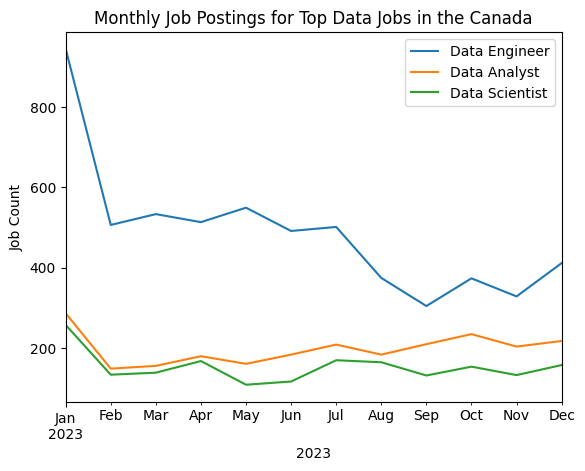

In [17]:
df_ca_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the Canada')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()